### This notebook generates the figure that summarizes task-related activity using mean-correlation-with-single-trials (mr2 == mean-rsquared) for task-classification ----> see task_class_assignment.ipynb

#### This must be run individually for each dataset.

In [1]:
### Load imports.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

import os
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib
import numpy as np
import time
import scipy.stats
import pickle

from collections import defaultdict

import h5py
from scipy.ndimage.filters import gaussian_filter1d
from scipy.stats import zscore

import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces
import cosmos.traces.clustering_utils as cu
import cosmos.params.trace_analyze_params as params 

matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 # truetype
matplotlib.rcParams['ps.fonttype'] = 42

/home/user/anaconda3/envs/cosmostools3_keras222/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
### Set up filepaths.
workstation = 'cosmosdata' #'analysis2'

if workstation == 'analysis2':
    base_dir = '/home/izkula/Dropbox/'
elif workstation == 'cosmosdata':
    base_dir = '/home/user/Dropbox'
    
data_dir = base_dir + '/cosmos_data/'
general_plots_save_dir = base_dir + '/cosmos/trace_analysis/'
fig_save_dir = base_dir + '/cosmos/fig_plots/fig3/'
bpod_dir = base_dir + '/cosmos_data/behavior/'
clustering_dir = base_dir + '/cosmos_data/clustering_results/'
cluster_figs_dir = base_dir + '/cosmos/fig_plots/fig3/'

    
# if not os.path.isdir(fig_save_dir):
os.makedirs(fig_save_dir, exist_ok=True)

In [3]:
# Which datasets to include
# datasets = [7, 19, 18, 11, 22, 23, 24, 25] #[18, 19] #[7, 11, 18, 19]
# datasets = [16] #[16] #[35] #[7, 11, 18, 19] #[18, 19] #[7, 11, 18, 19]

# datasets = [7, 19, 18, 11, 22, 23, 24, 25] ### Use this to compare multiple days
datasets = [7, 19, 18, 11] ### Use this if you just want to look at basic datasets.

datasets = [7, 11, 18, 19, 35]

mouse_colors = utils.get_colors(4, plt.cm.spectral);


In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
fig_save_dir

'/home/user/Dropbox/cosmos/fig_plots/fig3/'

20180401 cux2ai148m72_COSMOSTrainMultiBlockGNG_1
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing that ntrials is:211
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
lick rates bin size: 0.034
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_pre-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/polar_post-reward.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/licks.pdf
Saving to:  /home/user/Dropbox/cosmos/trace_analysis/20180401/cux2ai148m72_COSMOSTrainMultiBlockGNG_1/success_rate.pdf
LED trials: 212
Processing traces.
[-34.99899927 423.99899927]
[297.73913811 301.26086189]
Elapsed time: 18.480905294418335
20180420 cux2ai148m943_COSMOSTrainMultiBlockGNG_1
(1/3) Loading trace data.
(2/3) Loading behavior data.
While loading bpod, enforcing t

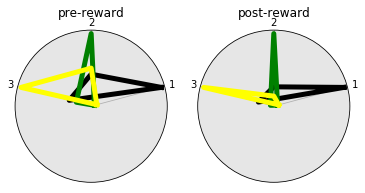

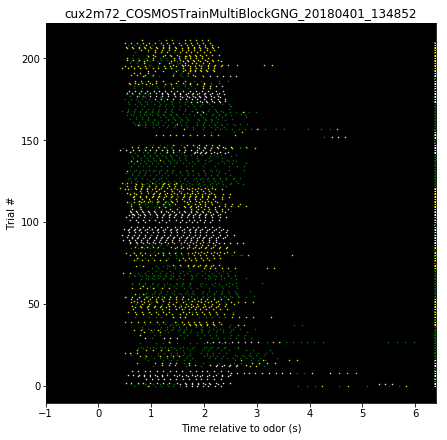

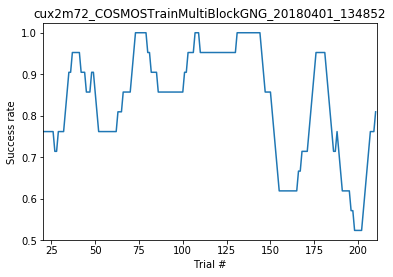

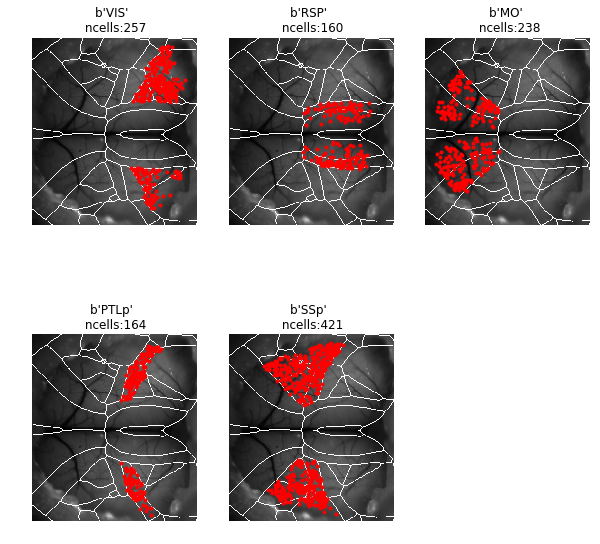

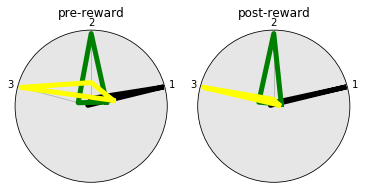

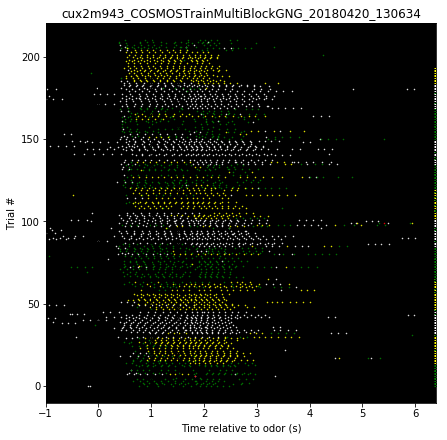

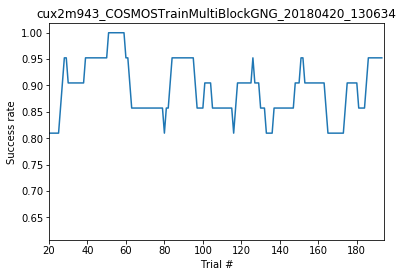

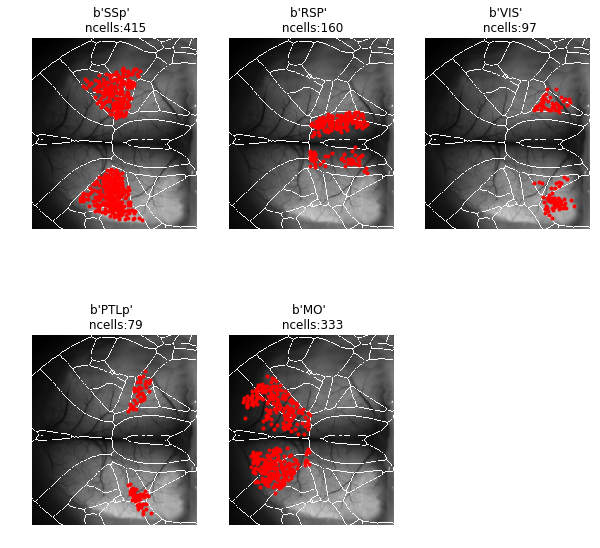

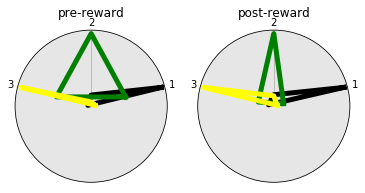

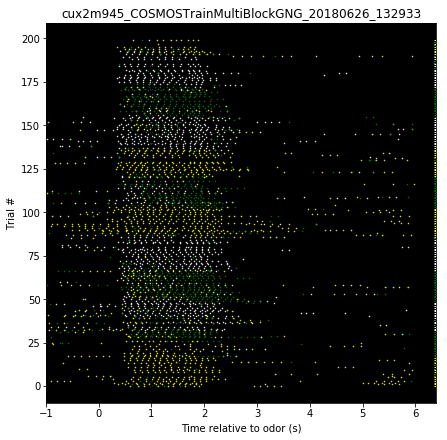

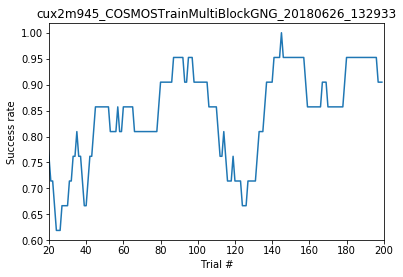

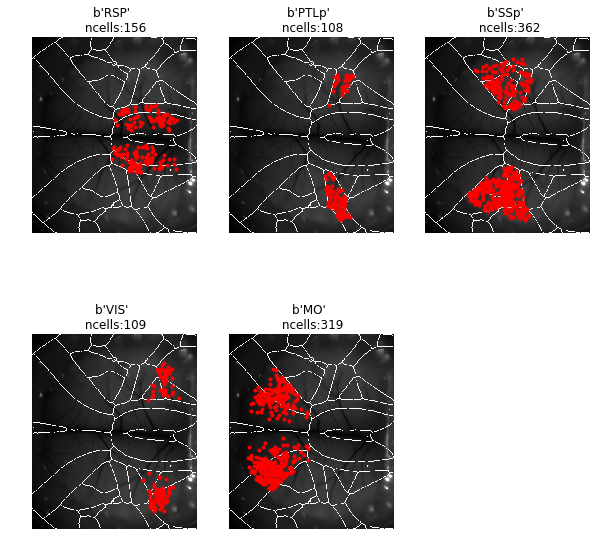

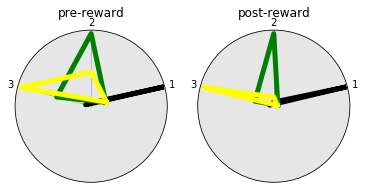

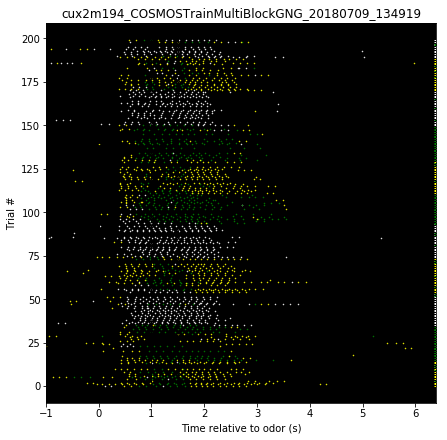

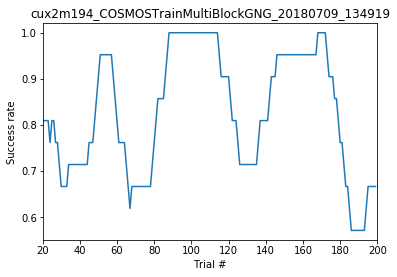

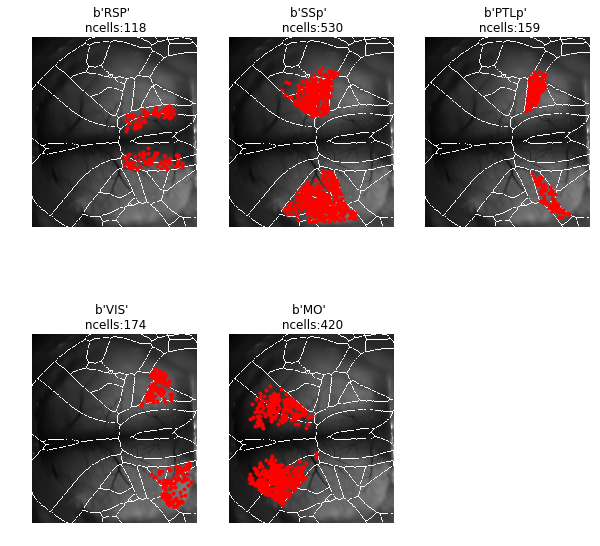

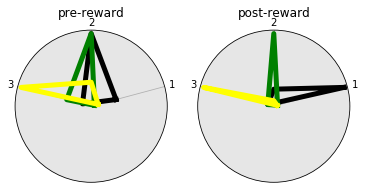

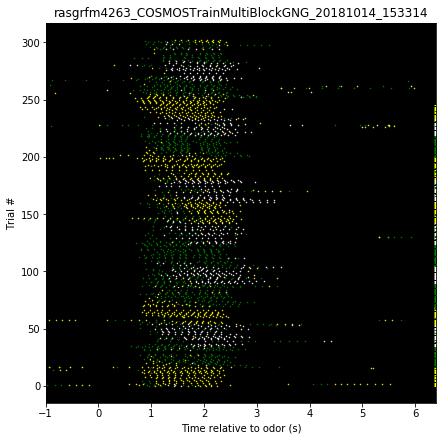

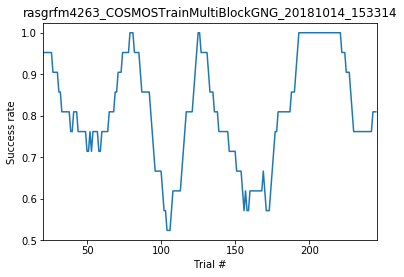

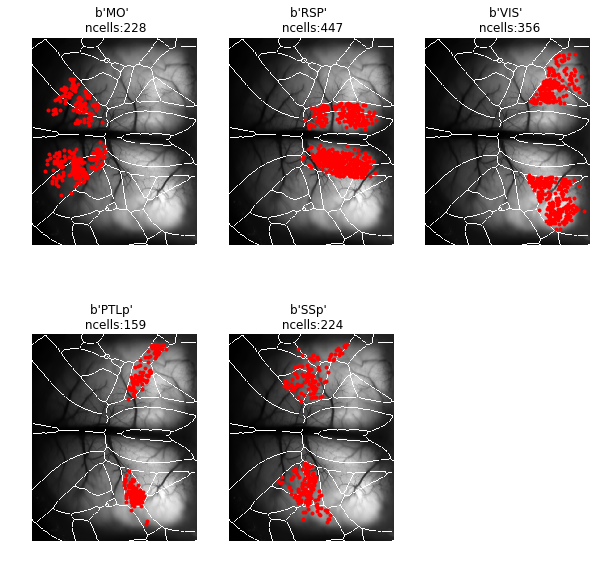

In [6]:
# Load all of the datasets (each their own class).
allCT = []
for dataset_id in datasets:
    dataset = params.DATASETS[dataset_id]
    print(dataset['date'], dataset['name'])
    dataset['data_root'] = data_dir
    dataset['fig_save_dir'] = general_plots_save_dir
    dataset['behavior_dir'] = bpod_dir
    
    startt = time.time()
    CT = CosmosTraces(dataset, do_region_plots=True)
    allCT.append(CT)
    print('Elapsed time: '+str(time.time() - startt))

### Begin --- plot task clusters for an individual dataset

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt7_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/7
Done computing rates.
0
701
/home/user/Dropbox/cosmos/fig_plots/fig3/7
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt11_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/11
Done computing rates.
0
593
/home/user/Dropbox/cosmos/fig_plots/fig3/11
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt18_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/18
Done computing rates.
0
573
/home/user/Dropbox/cosmos/fig_plots/fig3/18
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt19_r1_n40_l0.0.pkl
/home/user/Dropbox/co

/home/user/anaconda3/envs/cosmostools3_keras222/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/nmf_full_expt35_r1_n40_l0.0.pkl
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt35_r_n_l.pkl
Save to:
/home/user/Dropbox/cosmos/fig_plots/fig3/35
Done computing rates.
0
821
/home/user/Dropbox/cosmos/fig_plots/fig3/35


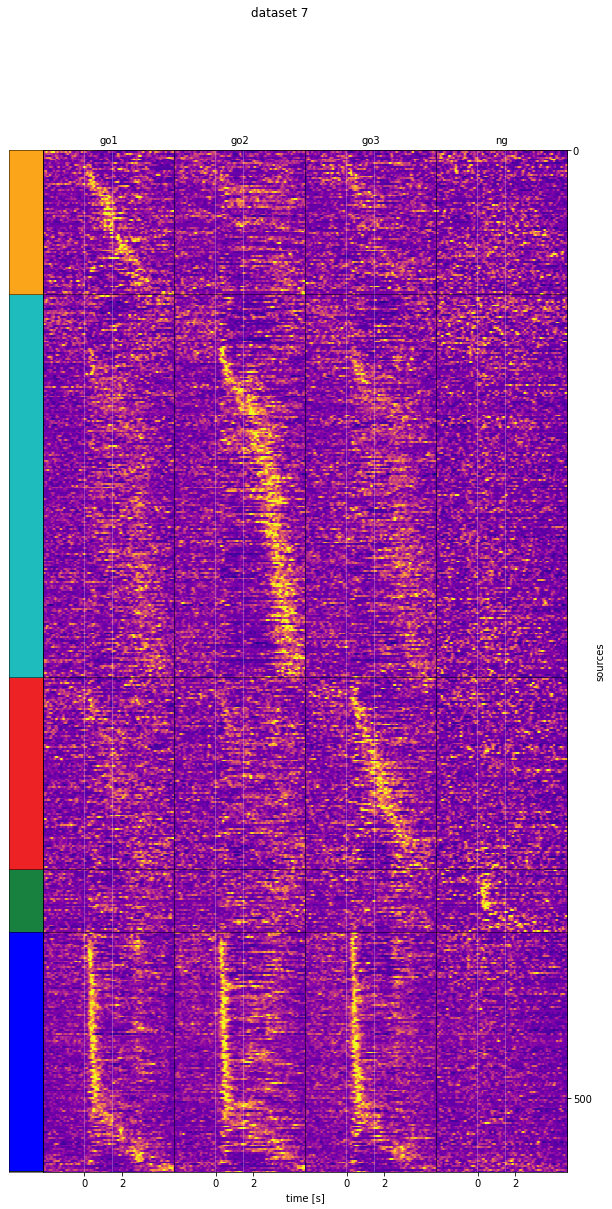

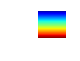

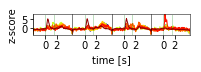

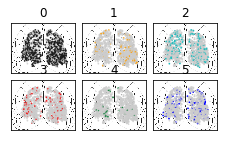

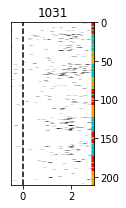

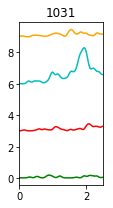

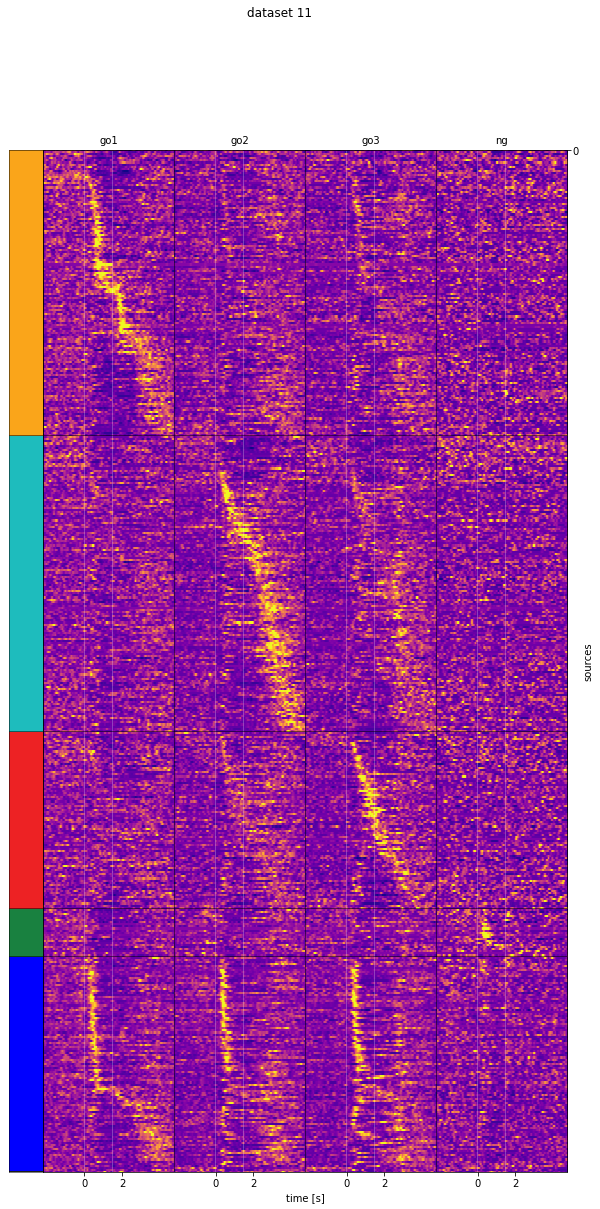

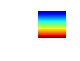

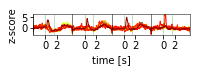

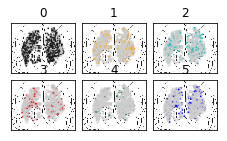

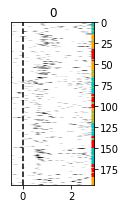

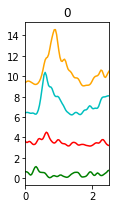

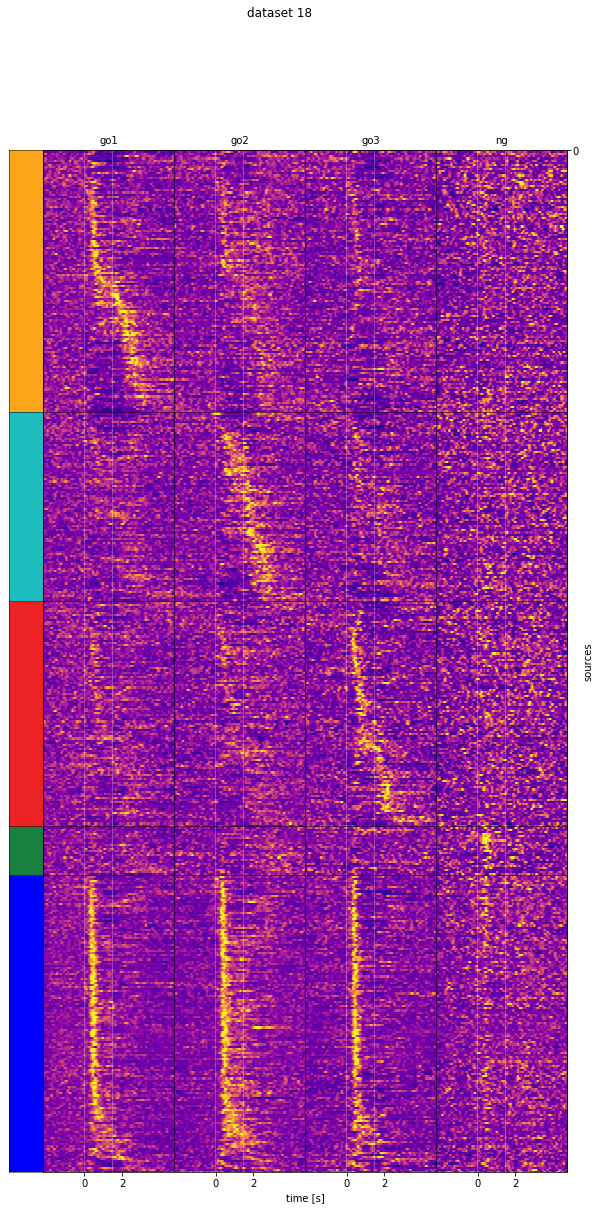

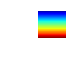

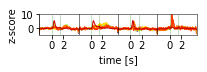

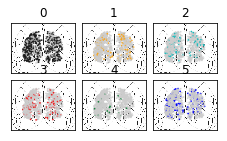

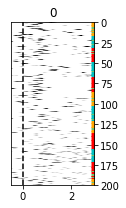

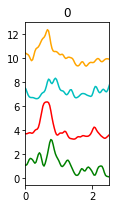

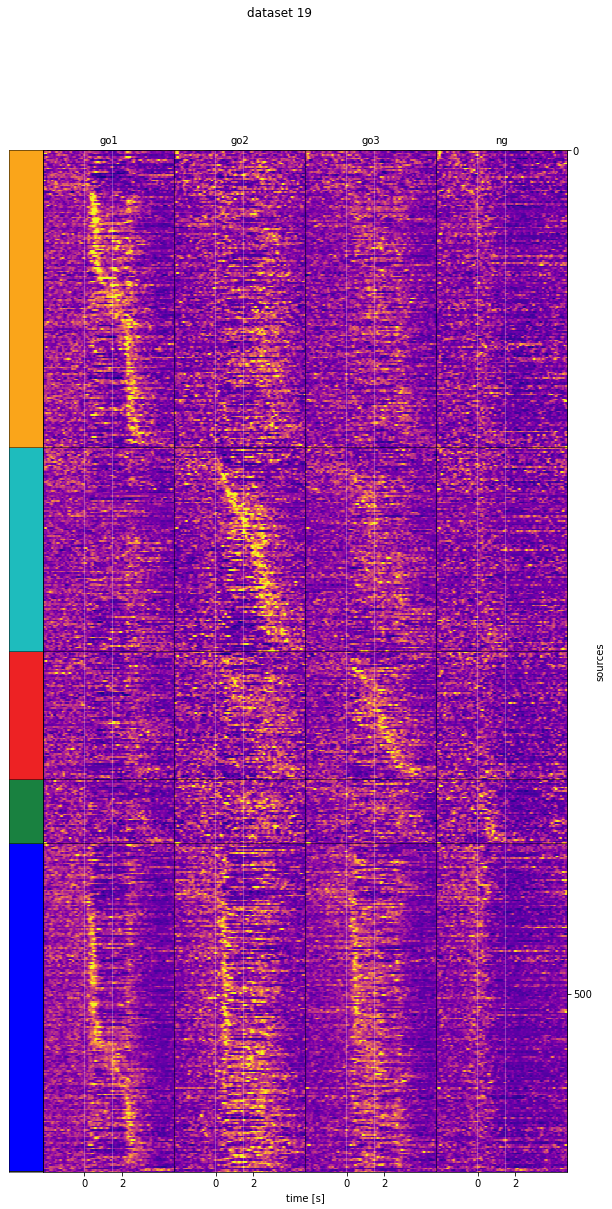

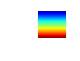

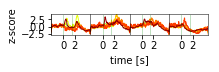

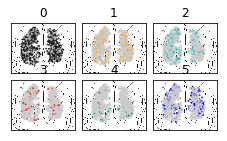

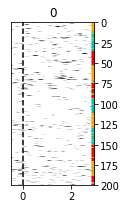

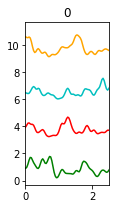

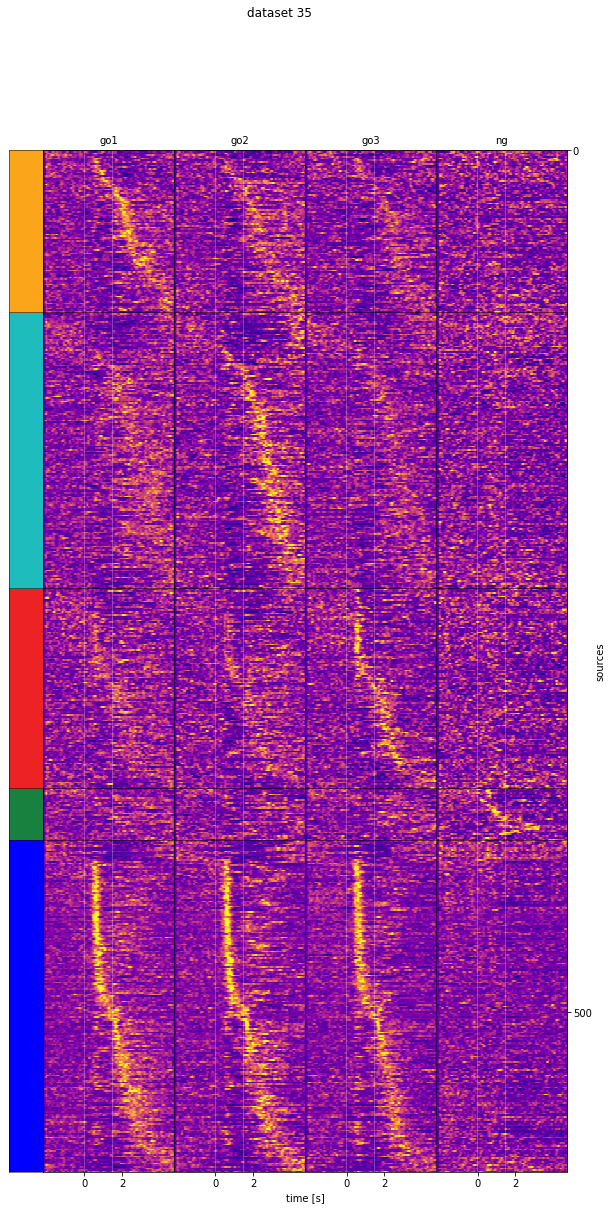

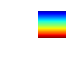

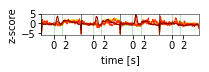

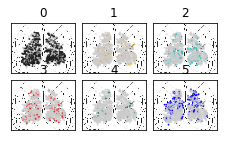

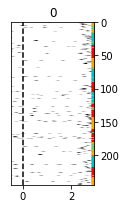

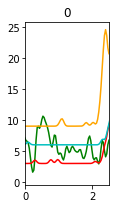

In [7]:
for dataset_id in [7, 11, 18, 19, 35]:
    CT_ind = int(np.where(np.array(datasets)==dataset_id)[0])

    [all_nmf, rates] = cu.plot_task_classification_for_one_dataset(dataset_id, CT_ind, allCT,  
                                                                   clustering_dir, cluster_figs_dir)

In [8]:
# If you want to explore which sources would be good, can plot with this
do_explore_single_sources = False
if do_explore_single_sources:
    for i in np.where(all_nmf['mr2']['ordered_super_clustering'] == 1)[0]:
        plt.figure()
        plt.imshow(rates[i, :, :].T)
        plt.title(i)

### End --- plot task clusters for an individual dataset

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt19_r_n_l.pkl
[-0.375  0.625  1.625  2.625  3.625]
[0.9803921568627451, 0.6470588235294118, 0.10196078431372549, 1.0]
[0.10800432 0.10253456 0.09089526 0.11336383 0.1222982 ]
[0.01926525 0.03066051 0.02657722 0.01434062 0.01720318]
[-0.225, 0.775, 1.775, 2.775, 3.775]
[0.11764705882352941, 0.7372549019607844, 0.7411764705882353, 1.0]
[0.14197198 0.12189991 0.12444793 0.11447678 0.06447107]
[0.0343446  0.01359703 0.01877215 0.02260207 0.01835739]
[-0.07500000000000001, 0.925, 1.9249999999999998, 2.925, 3.925]
[0.9294117647058824, 0.13333333333333333, 0.1411764705882353, 1.0]
[0.06955764 0.06515329 0.0601077  0.0928081  0.08961819]
[0.00616859 0.009

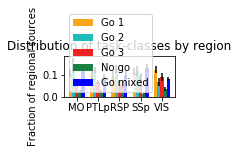

In [9]:
### Plot spatial distribution by region

dsets_spatial = [7, 11, 18, 19]

spatial_sets = [{'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''}]

(all_clusters_region_dist, 
 all_total_cells_per_region) = cu.get_task_clusters_per_region(datasets,
                                                            allCT,
                                                            spatial_sets, 
                                                            dsets_spatial,
                                                            clustering_dir
                                                           )

region_ordering = ['MO', 'PTLp', 'RSP', 'SSp', 'VIS']
(all_spatial_dist, 
 all_total_cells) = cu.organize_clusters_per_region(dsets_spatial,
                                                    all_clusters_region_dist,
                                                    all_total_cells_per_region,
                                                     regions=region_ordering)

do_group_by_region = True

if do_group_by_region:
#     region_colors = [[0, 0, 0, 1.0]] + cu.get_color_template()
    region_colors = cu.get_color_template()

    task_class_names = ['Unassigned', 'Go 1', 'Go 2', 'Go 3', 'No go', 'Go mixed']
    cu.plot_clusters_per_region(all_spatial_dist, all_total_cells, 
                                regions=region_ordering,
                                task_class_names=task_class_names,
                                do_normalize=True, bar_width=0.15, 
                                start_cluster=1, group_colors=region_colors,
                               group_by_region=True)
    
else:
    region_colors = [[.1,.1,.1], [.3,.3,.3], [.5,.5,.5], [.7,.7,.7], [.9,.9,.9]]
    task_class_names = ['Go 1', 'Go 2', 'Go 3', 'No go', 'Go mixed']
    cu.plot_clusters_per_region(all_spatial_dist, all_total_cells, 
                                regions=region_ordering,
                                task_class_names=task_class_names,
                                do_normalize=True, bar_width=0.15, 
                                start_cluster=1, group_colors=region_colors,
                               group_by_region=False)

### Do stats...
protocol = 'mr2'
plt.gcf().set_size_inches(w=2, h=0.75) # Control size of figure in inches
savename = 'sources_in_region_by_cluster'+'_'+protocol+'_{}'.format(do_group_by_region)+'.pdf'
plt.savefig(os.path.join(cluster_figs_dir, savename), 
            transparent=True, rasterized=True, dpi=600) 

### Begin ---- Plot spatial statistics for all datasets

In [10]:
### Plot spatial statistics

dsets_spatial = [7, 11, 18, 19, 35]

spatial_sets = [{'method':'classify', 'protocol':'mr2', 'randseed':'', 'n_components':'', 'l1':''}]

(centroids, labels) = cu.load_centroids_and_task_labels(datasets, 
                                                        allCT,
                                                        spatial_sets,
                                                        dsets_spatial,
                                                        clustering_dir
                                                       )

Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt7_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt11_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt18_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt19_r_n_l.pkl
Converting pixels to mm.
Loading: 
/home/user/Dropbox/cosmos_data/clustering_results/classify_mr2_expt35_r_n_l.pkl
Converting pixels to mm.


In [11]:
### Make dir for saveout
spatial_stat_dir = os.path.join(clustering_dir, 
                                'spatial_stat_mm')
os.makedirs(spatial_stat_dir, exist_ok=True)

In [12]:
spatial_stat_dir

'/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm'

In [13]:
### Compute pairwise distance histogram for each class

### 10k shuffles: two-sided ---> 5000, 10-way hist bonferonni ---> 500, 
### 5-way task class bonferonni ---> 100 --> p<0.01
### But, you can also just compute the p-value using percentile, and use fdr-bh

do_compute_pairwise_dists = True

if do_compute_pairwise_dists:
    clusts = np.arange(1, 6)
    nshuff=10001
    (all_shuffle_dists,
     all_dists) = cu.generate_all_pairwise_dists(labels, centroids, dsets_spatial, 
                                              clusts, spatial_stat_dir, nshuff=nshuff)

dset: 7, clust: 1, shuff: 0
dset: 7, clust: 1, shuff: 500
dset: 7, clust: 1, shuff: 1000
dset: 7, clust: 1, shuff: 1500
dset: 7, clust: 1, shuff: 2000
dset: 7, clust: 1, shuff: 2500
dset: 7, clust: 1, shuff: 3000
dset: 7, clust: 1, shuff: 3500
dset: 7, clust: 1, shuff: 4000
dset: 7, clust: 1, shuff: 4500
dset: 7, clust: 1, shuff: 5000
dset: 7, clust: 1, shuff: 5500
dset: 7, clust: 1, shuff: 6000
dset: 7, clust: 1, shuff: 6500
dset: 7, clust: 1, shuff: 7000
dset: 7, clust: 1, shuff: 7500
dset: 7, clust: 1, shuff: 8000
dset: 7, clust: 1, shuff: 8500
dset: 7, clust: 1, shuff: 9000
dset: 7, clust: 1, shuff: 9500
dset: 7, clust: 1, shuff: 10000
0.9946081638336182
1.3343005180358887
dset: 7, clust: 2, shuff: 0
dset: 7, clust: 2, shuff: 500
dset: 7, clust: 2, shuff: 1000
dset: 7, clust: 2, shuff: 1500
dset: 7, clust: 2, shuff: 2000
dset: 7, clust: 2, shuff: 2500
dset: 7, clust: 2, shuff: 3000
dset: 7, clust: 2, shuff: 3500
dset: 7, clust: 2, shuff: 4000
dset: 7, clust: 2, shuff: 4500
dset: 7,

dset: 18, clust: 2, shuff: 9000
dset: 18, clust: 2, shuff: 9500
dset: 18, clust: 2, shuff: 10000
0.9426782131195068
1.413384199142456
dset: 18, clust: 3, shuff: 0
dset: 18, clust: 3, shuff: 500
dset: 18, clust: 3, shuff: 1000
dset: 18, clust: 3, shuff: 1500
dset: 18, clust: 3, shuff: 2000
dset: 18, clust: 3, shuff: 2500
dset: 18, clust: 3, shuff: 3000
dset: 18, clust: 3, shuff: 3500
dset: 18, clust: 3, shuff: 4000
dset: 18, clust: 3, shuff: 4500
dset: 18, clust: 3, shuff: 5000
dset: 18, clust: 3, shuff: 5500
dset: 18, clust: 3, shuff: 6000
dset: 18, clust: 3, shuff: 6500
dset: 18, clust: 3, shuff: 7000
dset: 18, clust: 3, shuff: 7500
dset: 18, clust: 3, shuff: 8000
dset: 18, clust: 3, shuff: 8500
dset: 18, clust: 3, shuff: 9000
dset: 18, clust: 3, shuff: 9500
dset: 18, clust: 3, shuff: 10000
1.0621182918548584
4.520134925842285
dset: 18, clust: 4, shuff: 0
dset: 18, clust: 4, shuff: 500
dset: 18, clust: 4, shuff: 1000
dset: 18, clust: 4, shuff: 1500
dset: 18, clust: 4, shuff: 2000
dset

dset: 35, clust: 4, shuff: 6000
dset: 35, clust: 4, shuff: 6500
dset: 35, clust: 4, shuff: 7000
dset: 35, clust: 4, shuff: 7500
dset: 35, clust: 4, shuff: 8000
dset: 35, clust: 4, shuff: 8500
dset: 35, clust: 4, shuff: 9000
dset: 35, clust: 4, shuff: 9500
dset: 35, clust: 4, shuff: 10000
0.7757132053375244
0.8303382396697998
dset: 35, clust: 5, shuff: 0
dset: 35, clust: 5, shuff: 500
dset: 35, clust: 5, shuff: 1000
dset: 35, clust: 5, shuff: 1500
dset: 35, clust: 5, shuff: 2000
dset: 35, clust: 5, shuff: 2500
dset: 35, clust: 5, shuff: 3000
dset: 35, clust: 5, shuff: 3500
dset: 35, clust: 5, shuff: 4000
dset: 35, clust: 5, shuff: 4500
dset: 35, clust: 5, shuff: 5000
dset: 35, clust: 5, shuff: 5500
dset: 35, clust: 5, shuff: 6000
dset: 35, clust: 5, shuff: 6500
dset: 35, clust: 5, shuff: 7000
dset: 35, clust: 5, shuff: 7500
dset: 35, clust: 5, shuff: 8000
dset: 35, clust: 5, shuff: 8500
dset: 35, clust: 5, shuff: 9000
dset: 35, clust: 5, shuff: 9500
dset: 35, clust: 5, shuff: 10000
2.44

In [14]:
do_load_spatial_dists = True

if do_load_spatial_dists:
    nshuff = 10001
    clusts = np.arange(1, 6)
    all_shuffle_dists = dict()
    all_dists = dict()
    for dd in dsets_spatial:
        all_shuffle_dists[dd] = dict()
        all_dists[dd] = dict()
        for clust in clusts:
            fname = os.path.join(spatial_stat_dir, '{}_clust_{}_pairwise_dists_nshuff_{}.npz'.format(dd, clust, nshuff))
            print(fname)
            with open(fname, 'rb') as ff:
                out = np.load(ff)
                all_shuffle_dists[dd][clust] = out['shuffle_dists']
                all_dists[dd][clust] = out['dists']

/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_1_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_2_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_3_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_4_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/7_clust_5_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_1_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_2_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_3_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmos_data/clustering_results/spatial_stat_mm/11_clust_4_pairwise_dists_nshuff_10001.npz
/home/user/Dropbox/cosmo

In [15]:
### Get empirical CDFs and associated corrected p-values (takes a little bit of time).
empirical_dsets = [7, 11, 18, 19, 35]
bins = np.linspace(0, 7, 100)
(all_shuffle_cdf, all_cdf) = cu.get_cdfs(all_dists, 
                                         all_shuffle_dists, 
                                         bins, empirical_dsets)
all_pvals = cu.get_empirical_pvalues(all_shuffle_cdf, all_cdf, 
                                     empirical_dsets)
all_corrected_pvals = cu.get_corrected_pvals(all_pvals)

22.569072484970093
17.671252965927124
16.873980045318604
27.717470407485962
26.30622625350952


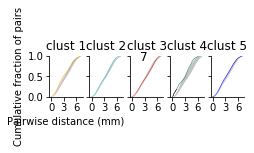

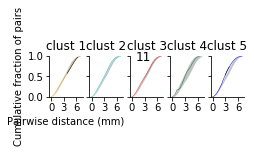

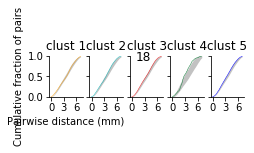

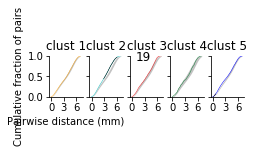

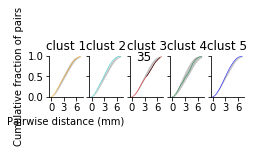

In [16]:
### Plot CDFs (fast once the cdf's have already been computed).
coloring = cu.get_color_template()[1:]
cu.overlay_spatial_cdfs_on_null_dist(all_shuffle_cdf, 
                                    all_cdf,
                                    bins, 
                                    all_corrected_pvals, 
                                    empirical_dsets,
                                    np.arange(1, 6),
                                    savepath=cluster_figs_dir,
                                    colors=coloring,
                                    shuff_shade_p=0.05
                                    )

In [17]:
### Get empirical histograms and associated corrected p-values (takes a little bit of time).

do_get_histograms = False

if do_get_histograms:
    bins = np.arange(0, 7, 0.5)
    (all_shuffle_hist,
     all_hist) = cu.generate_hists_from_dists(all_shuffle_dists,
                                           all_dists,
                                           empirical_dsets,
                                           np.arange(1, 6),
                                           bins)
    hist_pvals = cu.get_empirical_pvalues(all_shuffle_hist,
                                       all_hist,
                                       empirical_dsets)
    hist_corrected_pvals = cu.get_corrected_pvals(hist_pvals)

In [18]:
### Plot histograms (fast once the hists have already been computed).
if do_get_histograms:
    coloring = cu.get_color_template()[1:]
    cu.overlay_spatial_hists_on_null_dist(all_shuffle_hist,
                                       all_hist,
                                       bins[:-1],
                                       hist_corrected_pvals,
                                       empirical_dsets,
                                       np.arange(1, 6),
                                       savepath=cluster_figs_dir,
                                       colors=coloring,
                                       shuff_shade_p=0.05)

### Now simulate some data to see what sort of sensitivity you should have...

dset: 130, clust: 1, shuff: 0
dset: 130, clust: 1, shuff: 500
dset: 130, clust: 1, shuff: 1000
dset: 130, clust: 1, shuff: 1500
dset: 130, clust: 1, shuff: 2000
dset: 130, clust: 1, shuff: 2500
dset: 130, clust: 1, shuff: 3000
dset: 130, clust: 1, shuff: 3500
dset: 130, clust: 1, shuff: 4000
dset: 130, clust: 1, shuff: 4500
dset: 130, clust: 1, shuff: 5000
dset: 130, clust: 1, shuff: 5500
dset: 130, clust: 1, shuff: 6000
dset: 130, clust: 1, shuff: 6500
dset: 130, clust: 1, shuff: 7000
dset: 130, clust: 1, shuff: 7500
dset: 130, clust: 1, shuff: 8000
dset: 130, clust: 1, shuff: 8500
dset: 130, clust: 1, shuff: 9000
dset: 130, clust: 1, shuff: 9500
dset: 130, clust: 1, shuff: 10000
0.7765538692474365
0.8593215942382812
dset: 130, clust: 2, shuff: 0
dset: 130, clust: 2, shuff: 500
dset: 130, clust: 2, shuff: 1000
dset: 130, clust: 2, shuff: 1500
dset: 130, clust: 2, shuff: 2000
dset: 130, clust: 2, shuff: 2500
dset: 130, clust: 2, shuff: 3000
dset: 130, clust: 2, shuff: 3500
dset: 130, c

dset: 132, clust: 2, shuff: 4500
dset: 132, clust: 2, shuff: 5000
dset: 132, clust: 2, shuff: 5500
dset: 132, clust: 2, shuff: 6000
dset: 132, clust: 2, shuff: 6500
dset: 132, clust: 2, shuff: 7000
dset: 132, clust: 2, shuff: 7500
dset: 132, clust: 2, shuff: 8000
dset: 132, clust: 2, shuff: 8500
dset: 132, clust: 2, shuff: 9000
dset: 132, clust: 2, shuff: 9500
dset: 132, clust: 2, shuff: 10000
0.6491260528564453
0.6501262187957764
dset: 132, clust: 3, shuff: 0
dset: 132, clust: 3, shuff: 500
dset: 132, clust: 3, shuff: 1000
dset: 132, clust: 3, shuff: 1500
dset: 132, clust: 3, shuff: 2000
dset: 132, clust: 3, shuff: 2500
dset: 132, clust: 3, shuff: 3000
dset: 132, clust: 3, shuff: 3500
dset: 132, clust: 3, shuff: 4000
dset: 132, clust: 3, shuff: 4500
dset: 132, clust: 3, shuff: 5000
dset: 132, clust: 3, shuff: 5500
dset: 132, clust: 3, shuff: 6000
dset: 132, clust: 3, shuff: 6500
dset: 132, clust: 3, shuff: 7000
dset: 132, clust: 3, shuff: 7500
dset: 132, clust: 3, shuff: 8000
dset: 13

dset: 134, clust: 3, shuff: 7000
dset: 134, clust: 3, shuff: 7500
dset: 134, clust: 3, shuff: 8000
dset: 134, clust: 3, shuff: 8500
dset: 134, clust: 3, shuff: 9000
dset: 134, clust: 3, shuff: 9500
dset: 134, clust: 3, shuff: 10000
0.6419570446014404
0.6432616710662842
dset: 134, clust: 4, shuff: 0
dset: 134, clust: 4, shuff: 500
dset: 134, clust: 4, shuff: 1000
dset: 134, clust: 4, shuff: 1500
dset: 134, clust: 4, shuff: 2000
dset: 134, clust: 4, shuff: 2500
dset: 134, clust: 4, shuff: 3000
dset: 134, clust: 4, shuff: 3500
dset: 134, clust: 4, shuff: 4000
dset: 134, clust: 4, shuff: 4500
dset: 134, clust: 4, shuff: 5000
dset: 134, clust: 4, shuff: 5500
dset: 134, clust: 4, shuff: 6000
dset: 134, clust: 4, shuff: 6500
dset: 134, clust: 4, shuff: 7000
dset: 134, clust: 4, shuff: 7500
dset: 134, clust: 4, shuff: 8000
dset: 134, clust: 4, shuff: 8500
dset: 134, clust: 4, shuff: 9000
dset: 134, clust: 4, shuff: 9500
dset: 134, clust: 4, shuff: 10000
0.6499309539794922
0.6510710716247559
ds

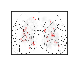

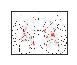

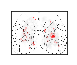

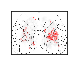

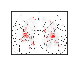

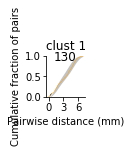

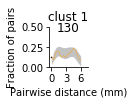

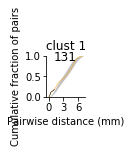

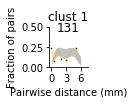

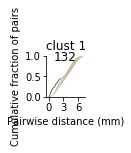

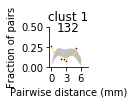

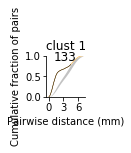

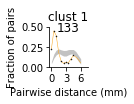

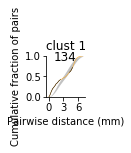

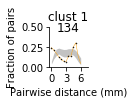

In [19]:
### Simulate clusters and plot spatial analyses.

savedir = os.path.join(cluster_figs_dir, 'simulated')

which_fake_dsets = [130, 131, 132, 133, 134]
# which_fake_dsets = [134]
template_dataset_id = 7

do_generate_fake_data = True
if do_generate_fake_data:
    template_CT = allCT[int(np.where(np.array(datasets)==template_dataset_id)[0])]
    template_labels = labels[template_dataset_id]
    template_centroids = centroids[template_dataset_id]
    (all_fake_labels,
     all_fake_centroids) = cu.get_all_fake_labels_and_centroids(which_fake_dsets,
                                                                template_labels,
                                                                template_centroids,
                                                                template_CT,
                                                                savedir=savedir)
do_compute_pairwise_dists = True
if do_compute_pairwise_dists:
    for fake_dset in all_fake_labels.keys():
        (all_shuffle_dists,
         all_dists) = cu.generate_all_pairwise_dists(all_fake_labels, 
                                                     all_fake_centroids, 
                                                     [fake_dset], 
                                                     clusts=[1], 
                                                     spatial_stat_dir=spatial_stat_dir, 
                                                     nshuff=10001)
        do_hist = True
        do_cdf = True
        if do_cdf:
            bins = np.linspace(0, 7, 100)
            cu.get_and_plot_empirical_cdfs(all_dists, 
                                           all_shuffle_dists,
                                           bins,
                                           [fake_dset],
                                           [1],
                                           savedir)
        if do_hist:
            ### Generate histograms and associated pvals
            bins = np.arange(0, 7, 0.5)
            cu.get_and_plot_empirical_hists(all_dists,
                                            all_shuffle_dists,
                                            bins,
                                            [fake_dset],
                                            [1],
                                            savedir)

### End ---- Plot spatial statistics for all datasets

In [20]:
raise('Done')

TypeError: exceptions must derive from BaseException

> <ipython-input-20-733a9420e381>(1)<module>()
----> 1 raise('Done')

ipdb> quit()


# See fig_cluster_summary_SINGLE_TRIAL for clustering stuff. 